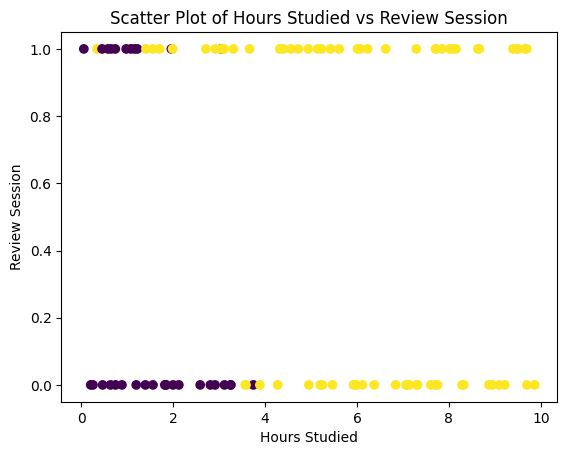

Coefficients: [[1.40365599 1.42846816]]
Intercept: [-4.58136123]
Accuracy: 0.85


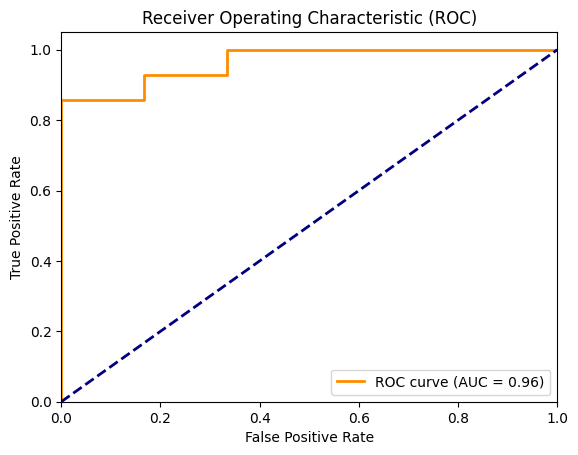

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_data.csv')

# Plot a scatter plot of 'Hours_Studied' and 'Review_Session' with colors based on 'Results'
plt.scatter(data['Hours_Studied'], data['Review_Session'], c=data['Results'], cmap='viridis')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Scatter Plot of Hours Studied vs Review Session')
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Split the data into features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Model ROC and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)





# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv("student_data.csv")  

# Split the data into features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Kernel SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Evaluate the linear SVM
linear_accuracy = linear_svm.score(X_test, y_test)
print("Linear SVM Accuracy:", linear_accuracy)

# 2. RBF Kernel SVM with Grid Search for Gamma
# Define the range of gamma values to search
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['rbf']}

# Create the SVM classifier
svm_rbf = SVC()

# Use Grid Search with Cross-Validation
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_gamma = best_params['gamma']

# Fit the RBF kernel SVM with the best gamma
rbf_svm = SVC(kernel='rbf', gamma=best_gamma)
rbf_svm.fit(X_train, y_train)

# Evaluate the RBF SVM
rbf_accuracy = rbf_svm.score(X_test, y_test)
print("RBF SVM Accuracy with Best Gamma (", best_gamma, "):", rbf_accuracy)


Linear SVM Accuracy: 0.85
RBF SVM Accuracy with Best Gamma ( 1 ): 0.85


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv("student_data.csv")  

# Set feature names as strings
data.columns = ['Hours_Studied', 'Review_Session', 'Results']

# Split the data into features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Kernel SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Evaluate the linear SVM
linear_accuracy = linear_svm.score(X_test, y_test)
print("Linear SVM Accuracy:", linear_accuracy)

# 2. RBF Kernel SVM with k-fold Cross-Validation
# Define the range of gamma values to search
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['rbf']}

best_gamma = None
best_accuracy = 0.0

for gamma in param_grid['gamma']:
    svm_rbf = SVC(kernel='rbf', gamma=gamma)
    accuracy = np.mean(cross_val_score(svm_rbf, X_train, y_train, cv=5))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_gamma = gamma

# Fit the RBF kernel SVM with the best gamma
rbf_svm = SVC(kernel='rbf', gamma=best_gamma)
rbf_svm.fit(X_train, y_train)

# Evaluate the RBF SVM
rbf_accuracy = rbf_svm.score(X_test, y_test)
print("RBF SVM Accuracy with Best Gamma (", best_gamma, "):", rbf_accuracy)




Linear SVM Accuracy: 0.85
RBF SVM Accuracy with Best Gamma ( 1 ): 0.85
